# Thông tin sinh viên

- Họ và tên: Đinh Xuân Khương
- MSSV: 23127398
- Lớp: 23CLC04

# Import

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Import thêm dữ thư viện nếu cần

# Đọc dữ liệu

In [53]:
# Đọc dữ liệu  bằng pandas
train = pd.read_csv('p03.train.csv')
test = pd.read_csv('p03.test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [157]:
# Cài đặt các hàm cần thiết ở đây
class OLSLinearRegression:
    def fit(self, X, y):
        ''' 
        This function is used to fit the model to the data. It uses the Ordinary Least Squares method to find the optimal parameters.

        Parameters
        ----------
        X : np.array
            Input data
        y : np.array
            Output data

        Returns
        -------
        self : object
            Returns the instance of the class
        
        '''

        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y

        return self


    def get_params(self):
        ''' 
        This function is used to get the parameters of the model.

        Returns
        -------
        self.w : np.array
            Optimal parameters (column vector)
        '''

        return self.w


    def predict(self, X):
        ''' 
        This function is used to predict the output of the model.

        Parameters
        ----------
        X : np.array
            Input data

        Returns
        -------
        X @ self.w : np.array
            Predicted output
        '''

        return X @ self.w  

def df_to_numpy(dataframe):
    return dataframe.to_numpy()

*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu

In [55]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Chỉ được phân tích trên tập huấn luyện
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)

X_train shape:  (9000, 5)
Y_train shape:  (9000,)


In [56]:
X_train.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,77,0,5,2
1,8,90,1,4,1
2,9,83,1,6,3
3,4,52,0,9,5
4,4,82,1,8,6


In [57]:
X_train.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
8995,2,41,1,4,6
8996,3,74,1,4,1
8997,7,65,0,4,1
8998,8,48,0,7,7
8999,4,59,0,9,7


In [58]:
y_train.head()

0    69.0
1    84.0
2    82.0
3    38.0
4    68.0
Name: Performance Index, dtype: float64

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     9000 non-null   int64
 1   Previous Scores                   9000 non-null   int64
 2   Extracurricular Activities        9000 non-null   int64
 3   Sleep Hours                       9000 non-null   int64
 4   Sample Question Papers Practiced  9000 non-null   int64
dtypes: int64(5)
memory usage: 351.7 KB


In [60]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 9000 entries, 0 to 8999
Series name: Performance Index
Non-Null Count  Dtype  
--------------  -----  
9000 non-null   float64
dtypes: float64(1)
memory usage: 70.4 KB


In [61]:
X_train.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4.976444,69.396111,0.493667,6.535556,4.590889
std,2.594647,17.369957,0.499988,1.695533,2.864570
min,1.000000,40.000000,0.000000,4.000000,0.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000


In [62]:
y_train.describe()

count    9000.000000
mean       55.136333
std        19.187669
min        10.000000
25%        40.000000
50%        55.000000
75%        70.000000
max       100.000000
Name: Performance Index, dtype: float64

#### Histograms

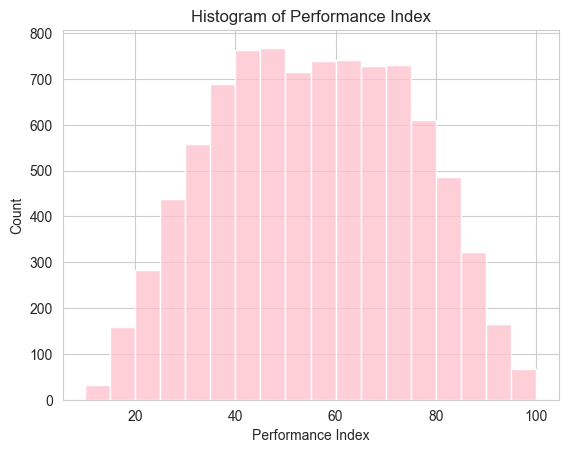

In [104]:
ax = sns.histplot(y_train, binrange=(10,100), binwidth = 5, color= 'pink')
plt.title("Histogram of Performance Index")
plt.show()

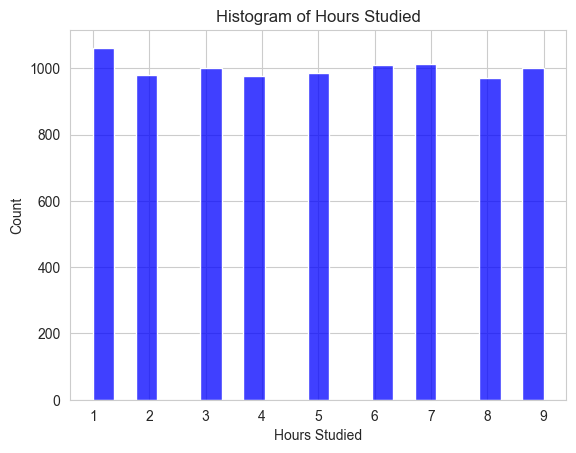

In [119]:
ax = sns.histplot(X_train["Hours Studied"], color= 'blue')
plt.title("Histogram of Hours Studied")
plt.show()

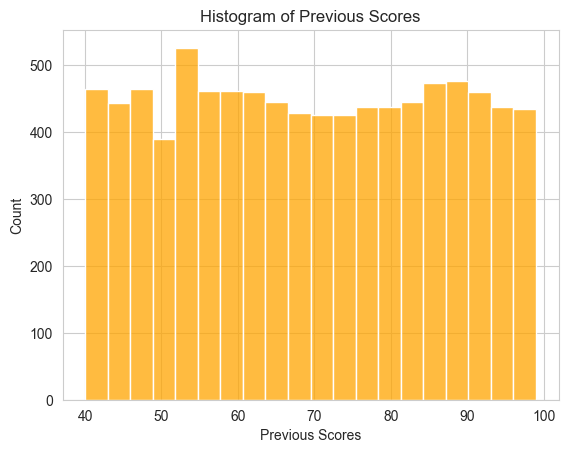

In [109]:
ax = sns.histplot(X_train["Previous Scores"], color= 'orange')
plt.title("Histogram of Previous Scores")
plt.show()

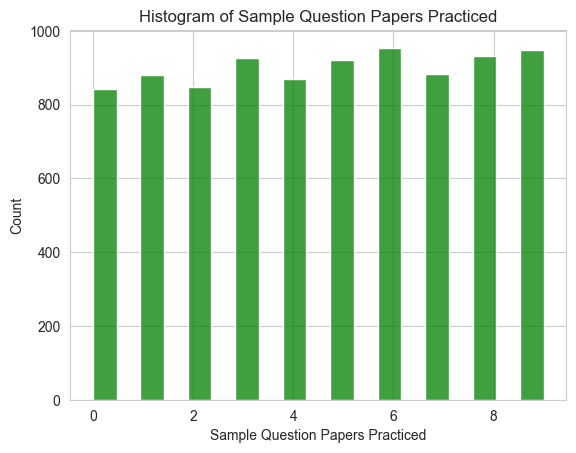

In [110]:
ax = sns.histplot(X_train["Sample Question Papers Practiced"], color= 'green')
plt.title("Histogram of Sample Question Papers Practiced")
plt.show()

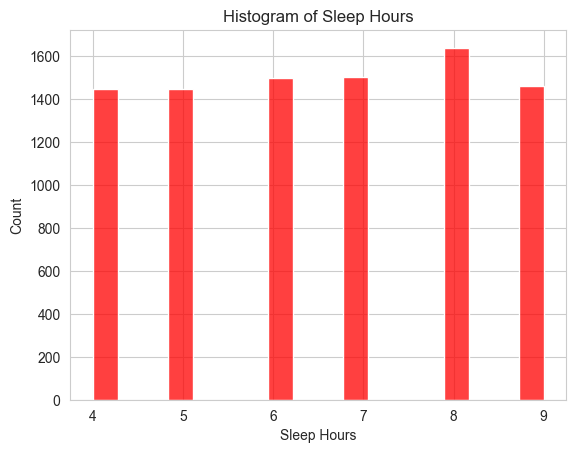

In [116]:
ax = sns.histplot(X_train["Sleep Hours"], color= 'r')
plt.title("Histogram of Sleep Hours")
plt.show()

### The dependency of Performance Index on other features 

#### Hours Studied

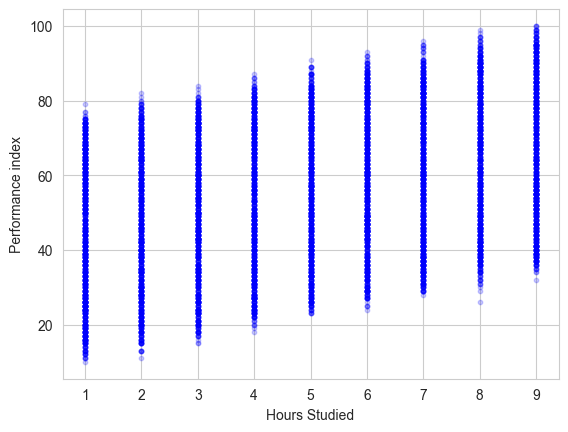

In [146]:
plt.scatter(X_train["Hours Studied"], y_train, color='blue', marker='o', s=10, alpha=0.2)

# Labels and title
plt.xlabel('Hours Studied')
plt.ylabel('Performance index')
plt.show()


#### Previous Scores

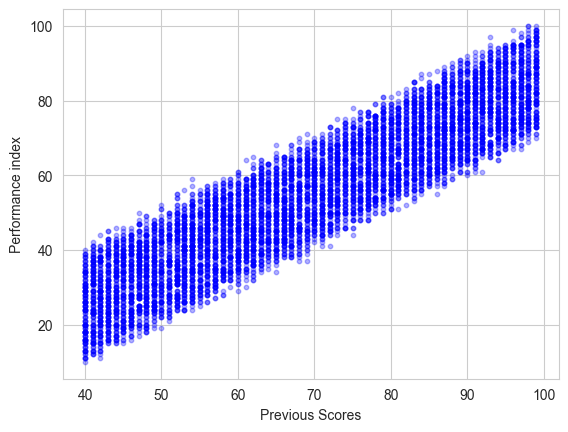

In [120]:
plt.scatter(X_train["Previous Scores"], y_train, color = "b", s = 10, alpha= 0.3)

plt.xlabel('Previous Scores')
plt.ylabel('Performance index')
plt.show()

#### Extracurricular Activities and Hours Studied
Vì Hoạt động ngoại khóa là dữ liệu True/False nên biểu đồ thích hợp nhất có thể dùng là biểu đồ hộp (Box plot)

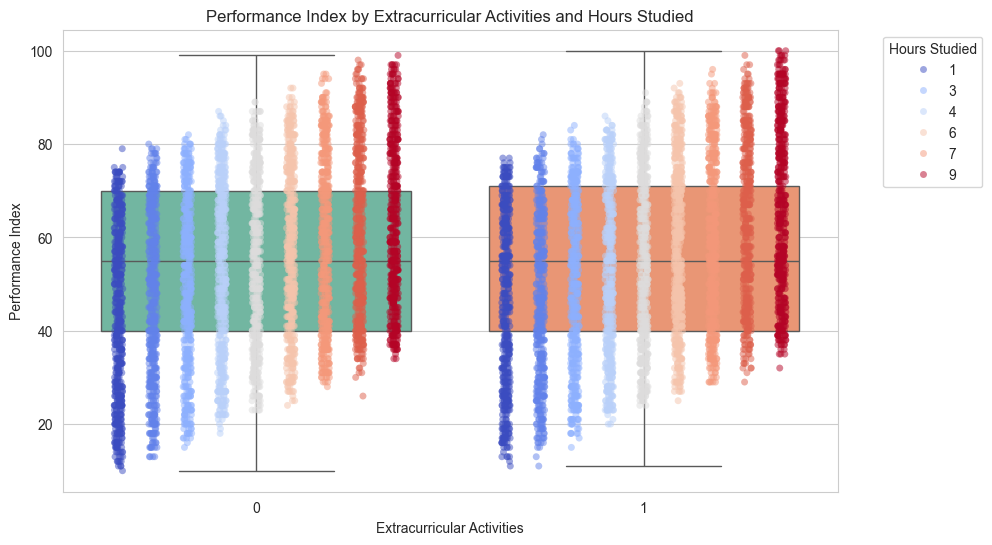

In [133]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train, x="Extracurricular Activities", y="Performance Index", hue="Extracurricular Activities", palette='Set2', legend=False)
sns.stripplot(x='Extracurricular Activities', y='Performance Index', data=train,
              hue='Hours Studied', palette='coolwarm', size=5, jitter=True, dodge=True, alpha=0.5)


plt.title('Performance Index by Extracurricular Activities and Hours Studied')
plt.legend(title='Hours Studied', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

So sánh số lượng phân bố giữa học sinh có tham gia hoạt động ngoại khóa và học sinh không tham gia

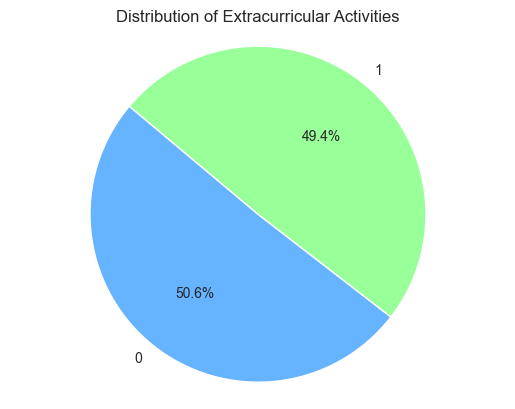

In [135]:
# Count the values
activity_counts = X_train['Extracurricular Activities'].value_counts()

# Create the pie chart
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=140)
plt.title("Distribution of Extracurricular Activities")
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.show()

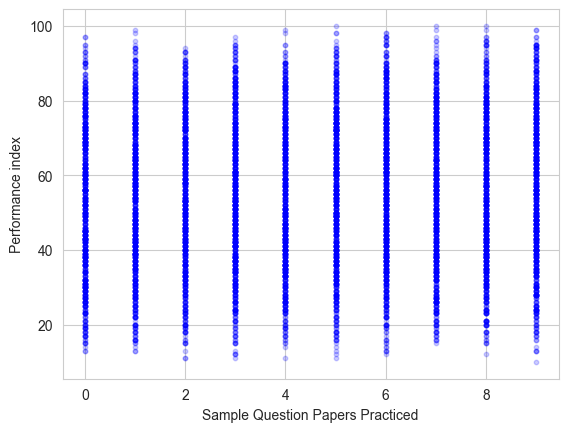

In [147]:
plt.scatter(X_train["Sample Question Papers Practiced"], y_train, color = "b", s = 10, alpha= 0.2)

plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance index')
plt.show()

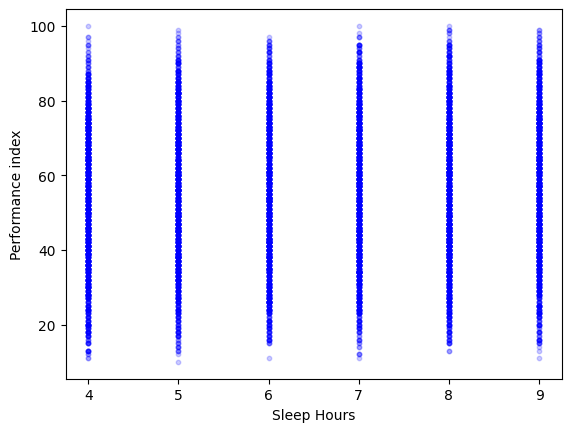

In [95]:
plt.scatter(X_train["Sleep Hours"], y_train, color='blue', marker='o', s=10, alpha=0.2)

# Labels and title
plt.xlabel('Sleep Hours')
plt.ylabel('Performance index')
plt.show()

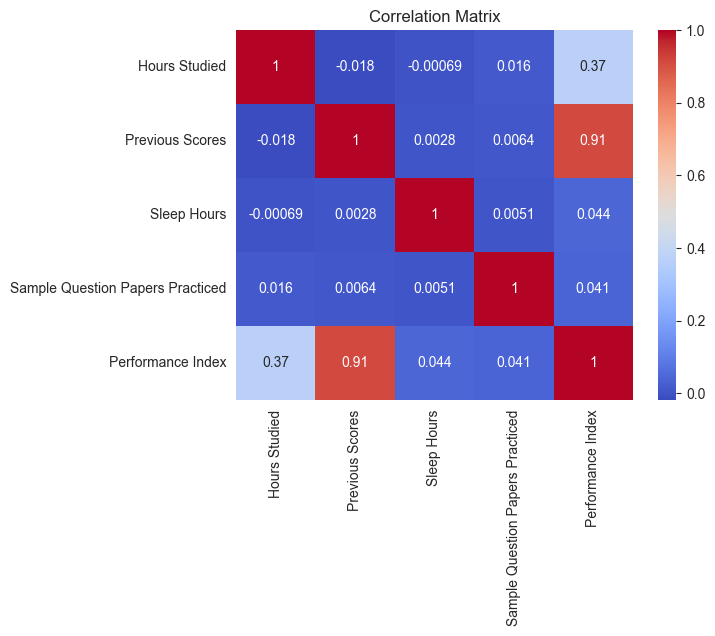

In [148]:
correlation_matrix = train[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

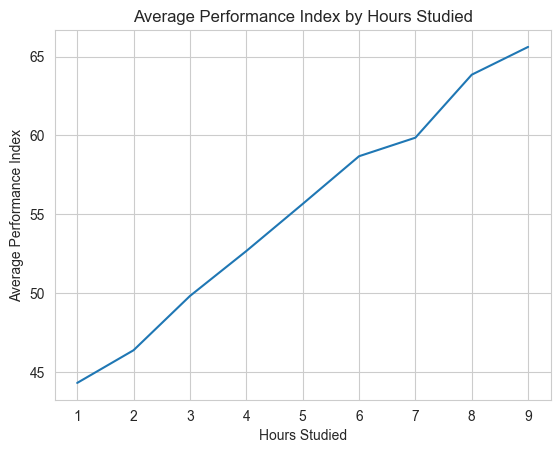

In [149]:
avg_performance_by_hours = train.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.xlabel('Hours Studied')
plt.ylabel('Average Performance Index')
plt.title('Average Performance Index by Hours Studied')
plt.show()

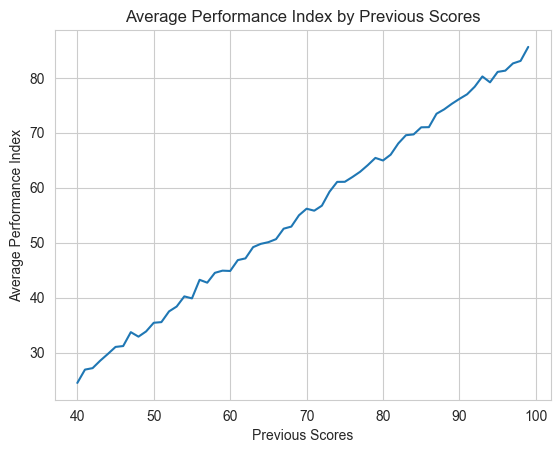

In [152]:
avg_performance_by_previous_score = train.groupby('Previous Scores')['Performance Index'].mean()
plt.plot(avg_performance_by_previous_score.index, avg_performance_by_previous_score.values)
plt.xlabel('Previous Scores')
plt.ylabel('Average Performance Index')
plt.title('Average Performance Index by Previous Scores')
plt.show()

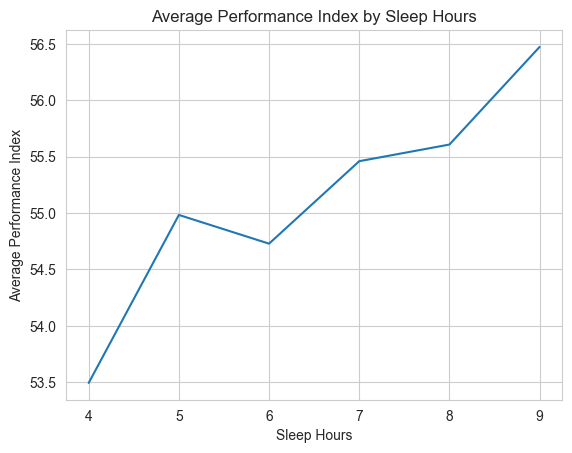

In [155]:
avg_performance_by_sleep_hours = train.groupby('Sleep Hours')['Performance Index'].mean()
plt.plot(avg_performance_by_sleep_hours.index, avg_performance_by_sleep_hours.values)
plt.xlabel('Sleep Hours')
plt.ylabel('Average Performance Index')
plt.title('Average Performance Index by Sleep Hours')
plt.show()

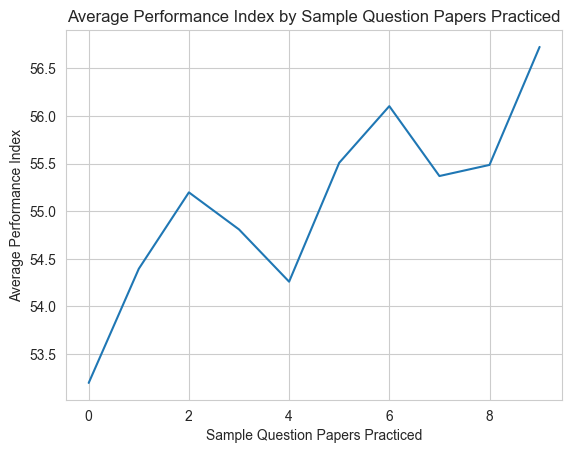

In [156]:
avg_performance_by_sample_papers = train.groupby('Sample Question Papers Practiced')['Performance Index'].mean()
plt.plot(avg_performance_by_sample_papers.index, avg_performance_by_sample_papers.values)
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Average Performance Index')
plt.title('Average Performance Index by Sample Question Papers Practiced')
plt.show()

# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp

In [ ]:
# Phần code cho yêu cầu 2a




In [65]:
# Gọi hàm MSE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra

Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$

# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [66]:
# Phần code cho yêu cầu 2b
# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
# In ra các kết quả cross-validation như yêu cầu

In [67]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

In [68]:
# Gọi hàm MSE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model

Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất

## Xây dựng/Thiết kế mô hình

In [69]:
# Trình bày toàn bộ code liên quan đến việc thiết kế mô hình

## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [70]:
# Phần code cho yêu cầu 2c
# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
# In ra các kết quả cross-validation như yêu cầu

In [71]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện

In [72]:
# Gọi hàm MSE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model

Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$